In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd /content/drive/MyDrive/RPI/Intro to ML/PUBG_Placement_Prediction/
%ls

/content/drive/MyDrive/RPI/Intro to ML/PUBG_Placement_Prediction
 Final_Project_Report_HaolinXiong_PUBG.gdoc
 final_testing_data.csv
 final_training_data.csv
'PlayerUnknown’s Battle Ground  Placement Prediction.gslides'
 Project_Report-1_HaolinXiong_PUBG.gdoc
'Pubg Game Prediction.txt'
 test_V2.csv
 train_sample.csv
 train_V2.csv


# **EDA**

In [ ]:
df = pd.read_csv('train_sample.csv')

In [ ]:
cor

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Unnamed: 0,1.000000,0.001085,0.000982,-0.001761,-0.000165,0.000444,0.001101,-0.000018,-0.000976,-0.000145,-0.000087,0.001534,-0.000164,-0.002242,-0.002440,0.000981,0.000169,0.001575,-0.000420,0.001134,0.001476,-0.002369,0.000093,0.000539,-0.001089,0.000926
assists,0.001085,1.000000,0.303577,0.411576,0.297680,0.203521,0.225023,-0.291476,0.036943,0.325561,0.246371,0.264809,-0.019929,-0.152778,-0.152084,-0.014452,0.197540,0.109998,0.011441,0.023226,0.010649,0.053031,0.287322,0.260495,0.022095,0.297548
boosts,0.000982,0.303577,1.000000,0.516459,0.356252,0.329832,0.531353,-0.556338,0.010549,0.496349,0.404701,0.422438,0.070921,-0.016127,-0.015590,0.021547,0.247468,0.327231,0.035398,0.107586,0.011892,0.090355,0.638901,0.395561,-0.005962,0.633802
damageDealt,-0.001761,0.411576,0.516459,1.000000,0.724054,0.618985,0.337254,-0.673906,0.049163,0.891566,0.701501,0.562753,-0.010998,-0.045146,-0.044931,-0.001609,0.249660,0.138566,0.052979,0.036584,0.022596,0.078812,0.391903,0.367510,0.017885,0.436631
DBNOs,-0.000165,0.297680,0.356252,0.724054,1.000000,0.458139,0.261580,-0.551860,0.041863,0.692958,0.643726,0.449172,-0.008043,-0.271058,-0.269344,-0.003156,0.298538,0.104673,0.033923,0.017642,0.071830,0.062199,0.285146,0.214253,0.010756,0.277027
headshotKills,0.000444,0.203521,0.329832,0.618985,0.458139,1.000000,0.195997,-0.462149,0.023269,0.678967,0.506648,0.437168,-0.019814,0.005237,0.004928,0.004626,0.141594,0.075826,0.015339,0.027915,0.009214,0.035043,0.245207,0.229308,0.005330,0.273577
heals,0.001101,0.225023,0.531353,0.337254,0.261580,0.195997,1.000000,-0.385800,-0.005975,0.306585,0.268586,0.263789,0.108983,-0.067692,-0.067278,0.022186,0.234200,0.296241,0.023108,0.080488,0.032688,0.064848,0.429734,0.302635,-0.014281,0.425664
killPlace,-0.000018,-0.291476,-0.556338,-0.673906,-0.551860,-0.462149,-0.385800,1.000000,-0.023758,-0.725026,-0.811065,-0.543155,-0.002739,0.017167,0.018859,-0.014566,-0.267762,-0.236526,-0.056257,-0.089484,-0.041248,-0.074101,-0.590424,-0.483246,-0.002719,-0.721465
killPoints,-0.000976,0.036943,0.010549,0.049163,0.041863,0.023269,-0.005975,-0.023758,1.000000,0.035894,0.037834,0.015597,-0.104294,-0.040390,-0.038480,-0.975317,0.010364,-0.030776,-0.003432,-0.010419,-0.040198,-0.010699,0.005279,-0.003082,0.983425,0.013874
kills,-0.000145,0.325561,0.496349,0.891566,0.692958,0.678967,0.306585,-0.725026,0.035894,1.000000,0.797225,0.600745,-0.034838,-0.008736,-0.008519,0.007672,0.244575,0.112836,0.062436,0.038338,0.023983,0.079246,0.368054,0.352811,0.007457,0.416154


In [ ]:
list(cor.columns)[1:12]

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill']

In [ ]:
cor.drop("Unnamed: 0",axis=1,inplace=True)
cor.drop("Unnamed: 0",axis=0,inplace=True)

In [ ]:
print(cor[:]['winPlacePerc'])

assists            0.297548
boosts             0.633802
damageDealt        0.436631
DBNOs              0.277027
headshotKills      0.273577
heals              0.425664
killPlace         -0.721465
killPoints         0.013874
kills              0.416154
killStreaks        0.377855
longestKill        0.410383
matchDuration     -0.006805
maxPlace           0.035806
numGroups          0.037691
rankPoints         0.012959
revives            0.238515
rideDistance       0.341821
roadKills          0.034547
swimDistance       0.148993
teamKills          0.015138
vehicleDestroys    0.073878
walkDistance       0.808453
weaponsAcquired    0.569273
winPoints          0.007583
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64


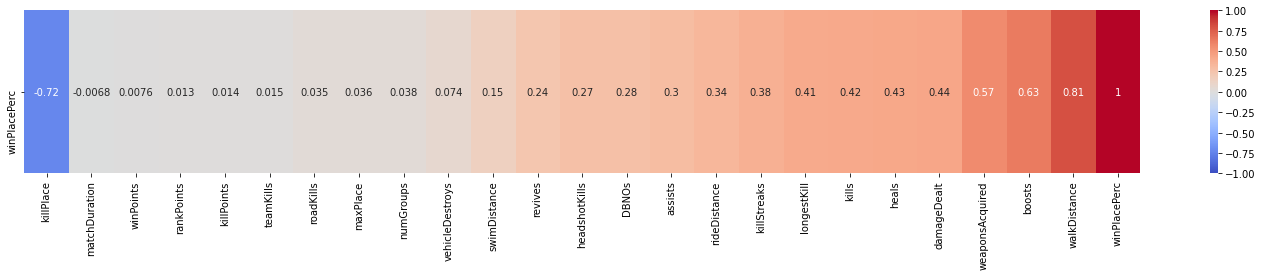

In [ ]:
plt.figure(figsize=(25,3))
sns.heatmap(cor[['winPlacePerc']].sort_values(by=['winPlacePerc'],ascending=False).T,
            vmin=-1,
            cmap='coolwarm',
            annot=True).invert_xaxis();


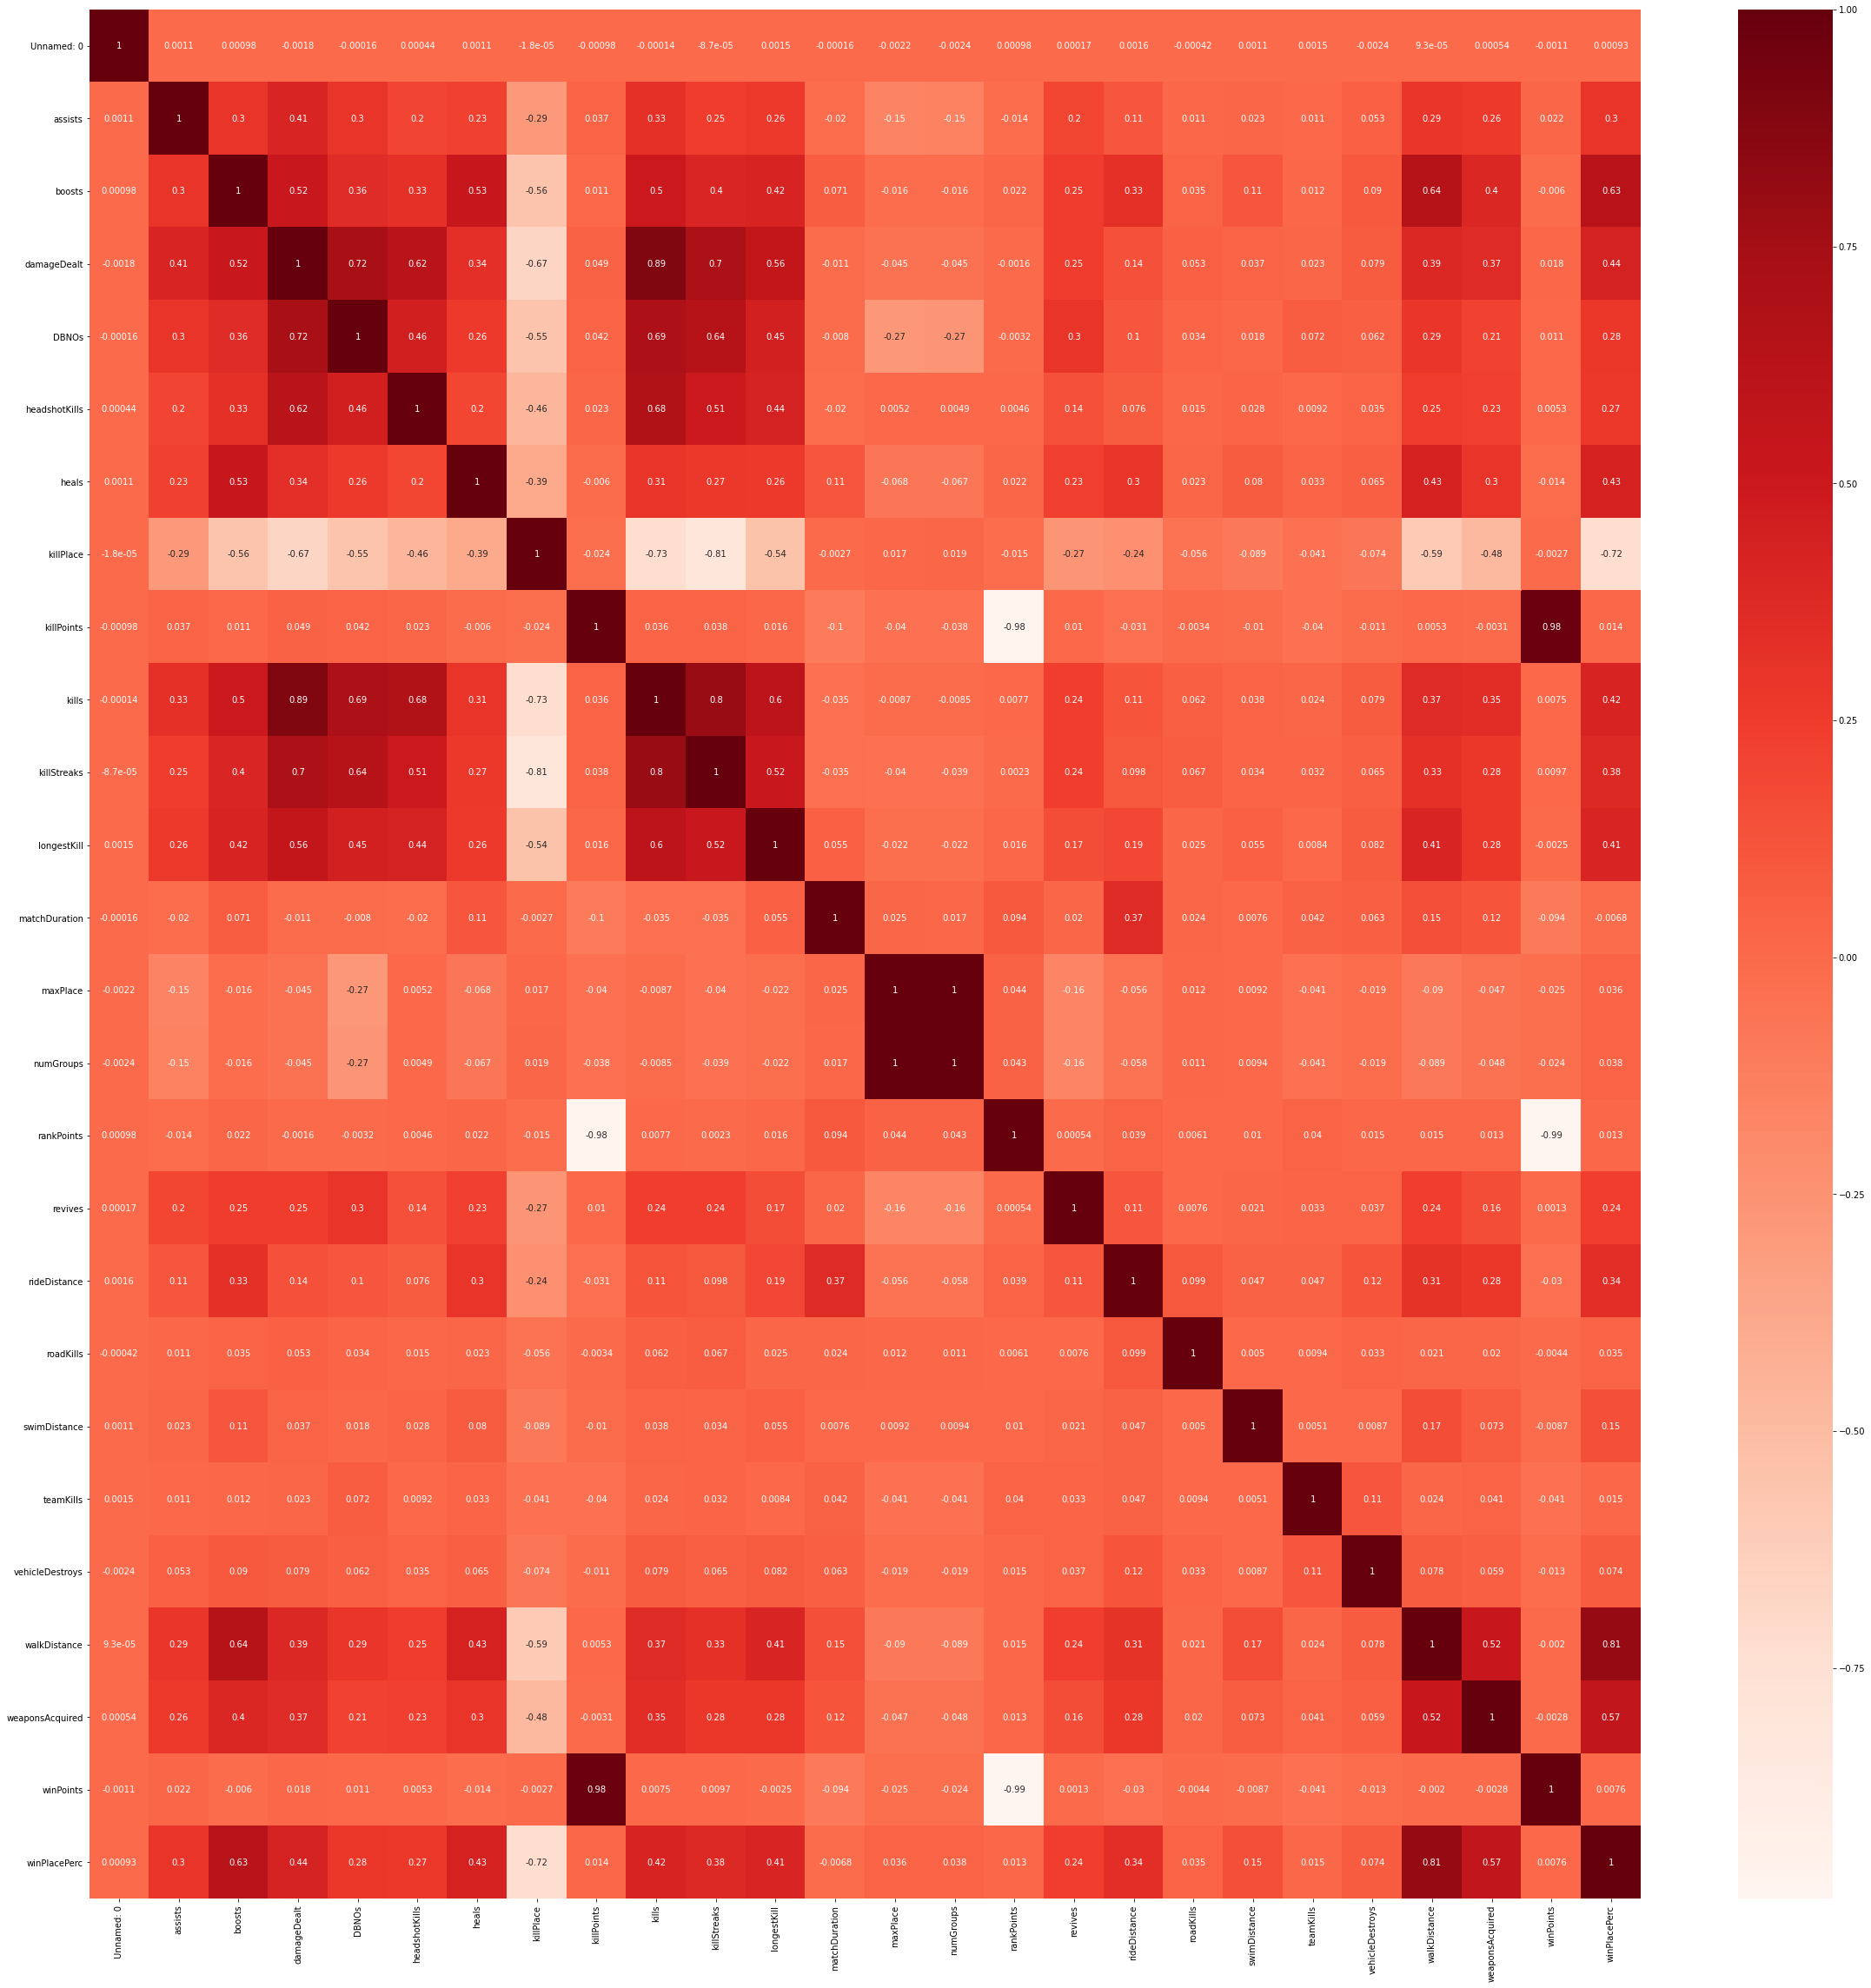

In [ ]:
plt.figure(figsize=(40,40))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#rankPoints are deprecated so dropped
df.drop('rankPoints',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df

In [ ]:
#Best way to win a game is to cheat
sns.lmplot(x='winPlacePerc',y='kills',data=df,fit_reg=False)
plt.show()

In [ ]:
list(df['kills'].value_counts().values)

In [ ]:
list(df['kills'].value_counts().keys())

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=list(df['kills'].value_counts().keys()),y=list(df['kills'].value_counts().values))
ax.set_xlabel('kills')
ax.set_ylabel('counts')
plt.show()

In [ ]:
df['kills'].value_counts().plot(kind='bar')

In [ ]:
sns.boxplot(y='kills',data=df)

In [ ]:
plt.figure(figsize=(40,40))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
match_type = df['matchType'].value_counts()

In [ ]:
abs(cor['winPlacePerc']).sort_values(ascending=False)

In [ ]:
match_type

In [ ]:
max(df['kills'])

In [ ]:
df.shape

**Simple Linear Regression**

In [ ]:
df.columns

In [ ]:
abs(cor['winPlacePerc']).sort_values(ascending=False)

In [ ]:
cor['winPlacePerc']

Unnamed: 0         0.000926
assists            0.297548
boosts             0.633802
damageDealt        0.436631
DBNOs              0.277027
headshotKills      0.273577
heals              0.425664
killPlace         -0.721465
killPoints         0.013874
kills              0.416154
killStreaks        0.377855
longestKill        0.410383
matchDuration     -0.006805
maxPlace           0.035806
numGroups          0.037691
rankPoints         0.012959
revives            0.238515
rideDistance       0.341821
roadKills          0.034547
swimDistance       0.148993
teamKills          0.015138
vehicleDestroys    0.073878
walkDistance       0.808453
weaponsAcquired    0.569273
winPoints          0.007583
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64

In [ ]:
list(abs(cor['winPlacePerc'].drop('winPlacePerc',axis=0)).sort_values(ascending=False).keys())

['walkDistance',
 'killPlace',
 'boosts',
 'weaponsAcquired',
 'damageDealt',
 'heals',
 'kills',
 'longestKill',
 'killStreaks',
 'rideDistance',
 'assists',
 'DBNOs',
 'headshotKills',
 'revives',
 'swimDistance',
 'vehicleDestroys',
 'numGroups',
 'maxPlace',
 'roadKills',
 'teamKills',
 'killPoints',
 'rankPoints',
 'winPoints',
 'matchDuration',
 'Unnamed: 0']

In [ ]:
corr_list = list(abs(cor['winPlacePerc'].drop('winPlacePerc',axis=0)).sort_values(ascending=False).keys())

In [ ]:
corr_list

['walkDistance',
 'killPlace',
 'boosts',
 'weaponsAcquired',
 'damageDealt',
 'heals',
 'kills',
 'longestKill',
 'killStreaks',
 'rideDistance',
 'assists',
 'DBNOs',
 'headshotKills',
 'revives',
 'swimDistance',
 'vehicleDestroys',
 'numGroups',
 'maxPlace',
 'roadKills',
 'teamKills',
 'killPoints',
 'rankPoints',
 'winPoints',
 'matchDuration']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(df[['walkDistance','killPlace']],df['winPlacePerc'], random_state = 0, test_size=0.3)
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.predict(X_test)
y_predict = reg.predict(X_test)
print('MAE of Linear Reg:',mean_absolute_error(y_test,y_predict))

In [ ]:
itr = 1
MAE_dict = dict()
while itr < len(corr_list):
  X_train, X_test, y_train, y_test = train_test_split(df[corr_list[0:itr]],df['winPlacePerc'], random_state = 0, test_size=0.3)
  reg=LinearRegression()
  reg.fit(X_train,y_train)
  reg.predict(X_test)
  y_predict = reg.predict(X_test)
  MAE = mean_absolute_error(y_test,y_predict)
  print('MAE of Linear Reg with', itr,'features:',MAE)
  MAE_dict[itr] = MAE
  itr = itr + 1

In [ ]:
fig = sns.pointplot(x=list(MAE_dict.keys()), y=list(MAE_dict.values()))
plt.xlabel("# of features")
plt.ylabel("MAE")
plt.title("MAE vs. # of features") # You can comment this line out if you don't need title
plt.show(fig)

# **Deal With Cheaters**

All teams with at least one player with >20 kills are removed

445296 original

445127 players left

In [ ]:
df['kills'].describe()

count    445296.000000
mean          0.930024
std           1.579897
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          72.000000
Name: kills, dtype: float64

In [ ]:
true_df = df.copy()

In [ ]:
cheater_team = df.loc[df['kills']>20]

In [ ]:
cheater_team

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3826,3826,44513e16340a63,c1e3f56e09b9a4,cf5dd782577ea9,1,2,2767.0,24,17,1,1,1355,22,3,670.90,1877,squad,27,26,-1,0,2589.00,0,0.0,0,0,3290.00,7,1509,0.9615
19280,19280,420fb4dee47e59,5d037a239647dd,db6f6d1f0d4904,0,0,1757.0,0,1,4,2,0,24,3,56.96,898,normal-solo-fpp,20,15,1500,0,40.96,0,0.0,0,0,1158.00,37,0,0.9474
27283,27283,7bfaeb8870182a,6b0360ae91b260,6680c7c3d17d48,10,3,2397.0,0,7,11,11,0,24,1,52.87,1800,normal-squad,15,15,1500,0,0.00,0,0.0,0,0,0.00,53,0,0.7857
28372,28372,0d065e5b70350c,67b809f35d898b,db6f6d1f0d4904,1,0,1890.0,0,6,5,1,0,25,3,96.68,898,normal-solo-fpp,20,15,1500,0,0.00,0,0.0,0,0,15.08,22,0,1.0000
39763,39763,aedfb11a6660ef,c92154670b7444,99006c081023c4,1,0,2287.0,0,15,0,4,1000,22,4,30.19,897,normal-solo-fpp,21,13,-1,0,0.00,0,0.0,0,0,24.57,14,1500,0.8500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420036,420036,23e46b7521aeca,8aa4348ad1274d,0f09bd72c4ba97,3,0,2716.0,0,4,16,3,1000,27,3,113.80,1794,normal-squad-fpp,8,8,-1,0,0.00,0,0.0,0,0,0.00,63,1500,0.8571
424254,424254,14efaf83a6eddd,45b0cc65c33ff6,3968ebcef3bf3a,6,0,2544.0,0,4,1,1,0,28,4,27.83,899,normal-solo-fpp,16,12,1500,0,0.00,0,0.0,0,0,182.40,31,0,1.0000
424275,424275,6874be9215646b,af1d17223258d0,0f09bd72c4ba97,1,0,3006.0,0,9,18,2,1000,33,2,150.30,1794,normal-squad-fpp,8,8,-1,0,0.00,0,0.0,0,0,557.50,20,1500,0.4286
427561,427561,9cf1ea2c99c459,37db4455395a98,bddd95cbb3bf1e,0,5,2305.0,0,6,9,1,0,23,2,300.60,1889,solo-fpp,93,90,1500,0,2654.00,0,0.0,0,0,3467.00,8,0,1.0000


In [ ]:
#drop the cheaters' team
cheater_team_id = list(cheater_team['groupId'])
true_df['cheater'] = df['groupId'].apply(lambda x: x in cheater_team_id)
true_df.drop(true_df.loc[true_df['cheater']].index,inplace=True)
true_df.reset_index(inplace=True,drop=True)

In [ ]:
len(df)

In [ ]:
corr_list

['walkDistance',
 'killPlace',
 'boosts',
 'weaponsAcquired',
 'damageDealt',
 'heals',
 'kills',
 'longestKill',
 'killStreaks',
 'rideDistance',
 'assists',
 'DBNOs',
 'headshotKills',
 'revives',
 'swimDistance',
 'vehicleDestroys',
 'numGroups',
 'maxPlace',
 'roadKills',
 'teamKills',
 'killPoints',
 'rankPoints',
 'winPoints',
 'matchDuration']

# Divide dataframe by match type(Didn't end up using it)
squad-fpp          
duo-fpp            
squad                
solo-fpp             
duo                  
solo

others

In [ ]:
all_match_type = set(true_df.matchType)
all_match_type

In [ ]:
true_df['matchType'].value_counts()

In [ ]:
regular_types = ['squad-fpp','duo-fpp','squad','solo-fpp','duo','solo']
other_types = ['normal-squad-fpp','flaretpp','crashfpp','normal-duo-fpp','normal-solo-fpp','flarefpp','normal-squad','normal-solo','normal-duo']

In [ ]:
true_df2 = true_df.copy()

In [ ]:
def modify_match_type(x):
  a = 'other' if x in other_types else x
  return a

In [ ]:
true_df2['matchType'] = true_df2['matchType'].map(lambda x: modify_match_type(x))

In [ ]:
set(true_df2['matchType'])

# Implement Random Forest, XGBoost, KNN, SVM

Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold

In [ ]:
true_df3 = true_df.copy()

In [ ]:
true_df3.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'cheater'],
      dtype='object')

In [ ]:
target_label = ['winPlacePerc']
feature_label = corr_list[0:9]
X = pd.DataFrame(true_df3,columns= feature_label)
y = pd.DataFrame(true_df3,columns= target_label)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = true_df3['matchId'], random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((356101, 9), (89026, 9), (356101, 1), (89026, 1))

Random Forest Regressor

In [ ]:
def my_Random_Forest(X_train, X_test, y_train, y_test):
  from sklearn.metrics import mean_absolute_error
  from sklearn.ensemble import RandomForestRegressor
  forest = RandomForestRegressor(n_estimators = 80, max_depth=5,n_estimators = 80 random_state = 0)
  forest.fit(X_train, y_train)
  y_pred = forest.predict(X_test)
  print('Random Forest MAE:', mean_absolute_error(y_test, y_pred))
  forest_importance = forest.feature_importances_
  for i in range(len(forest_importance)):
    print(feature_label[i],':',forest_importance[i])

In [93]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 80, max_depth=5,min_samples_leaf=1, random_state = 0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Random Forest MAE:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest MAE: 0.08749449623350786


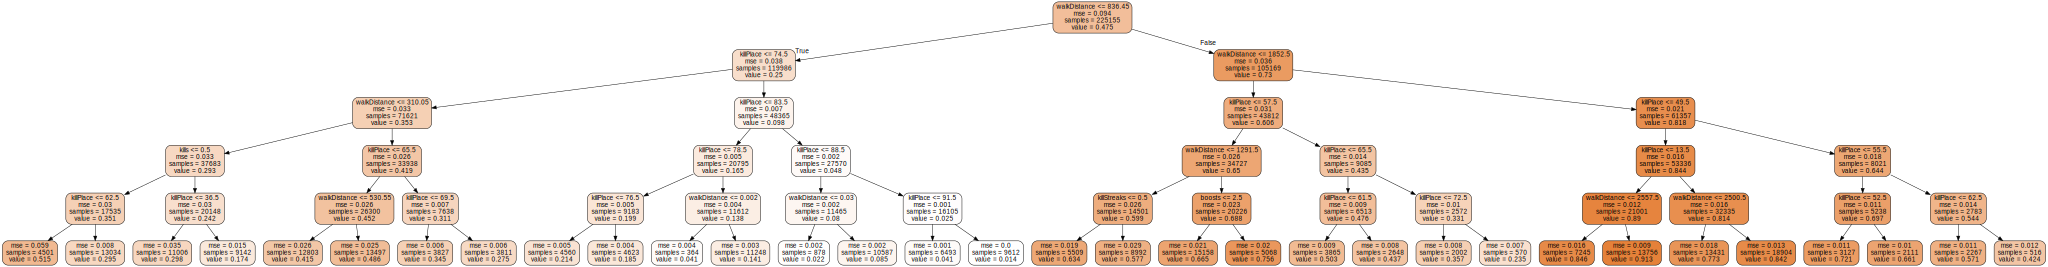

In [99]:
import graphviz
dot_data = tree.export_graphviz(forest.estimators_[0], out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
dot_data = tree.export_graphviz(forest.estimators_[0], out_file=None,
feature_names=X_train.columns,
filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

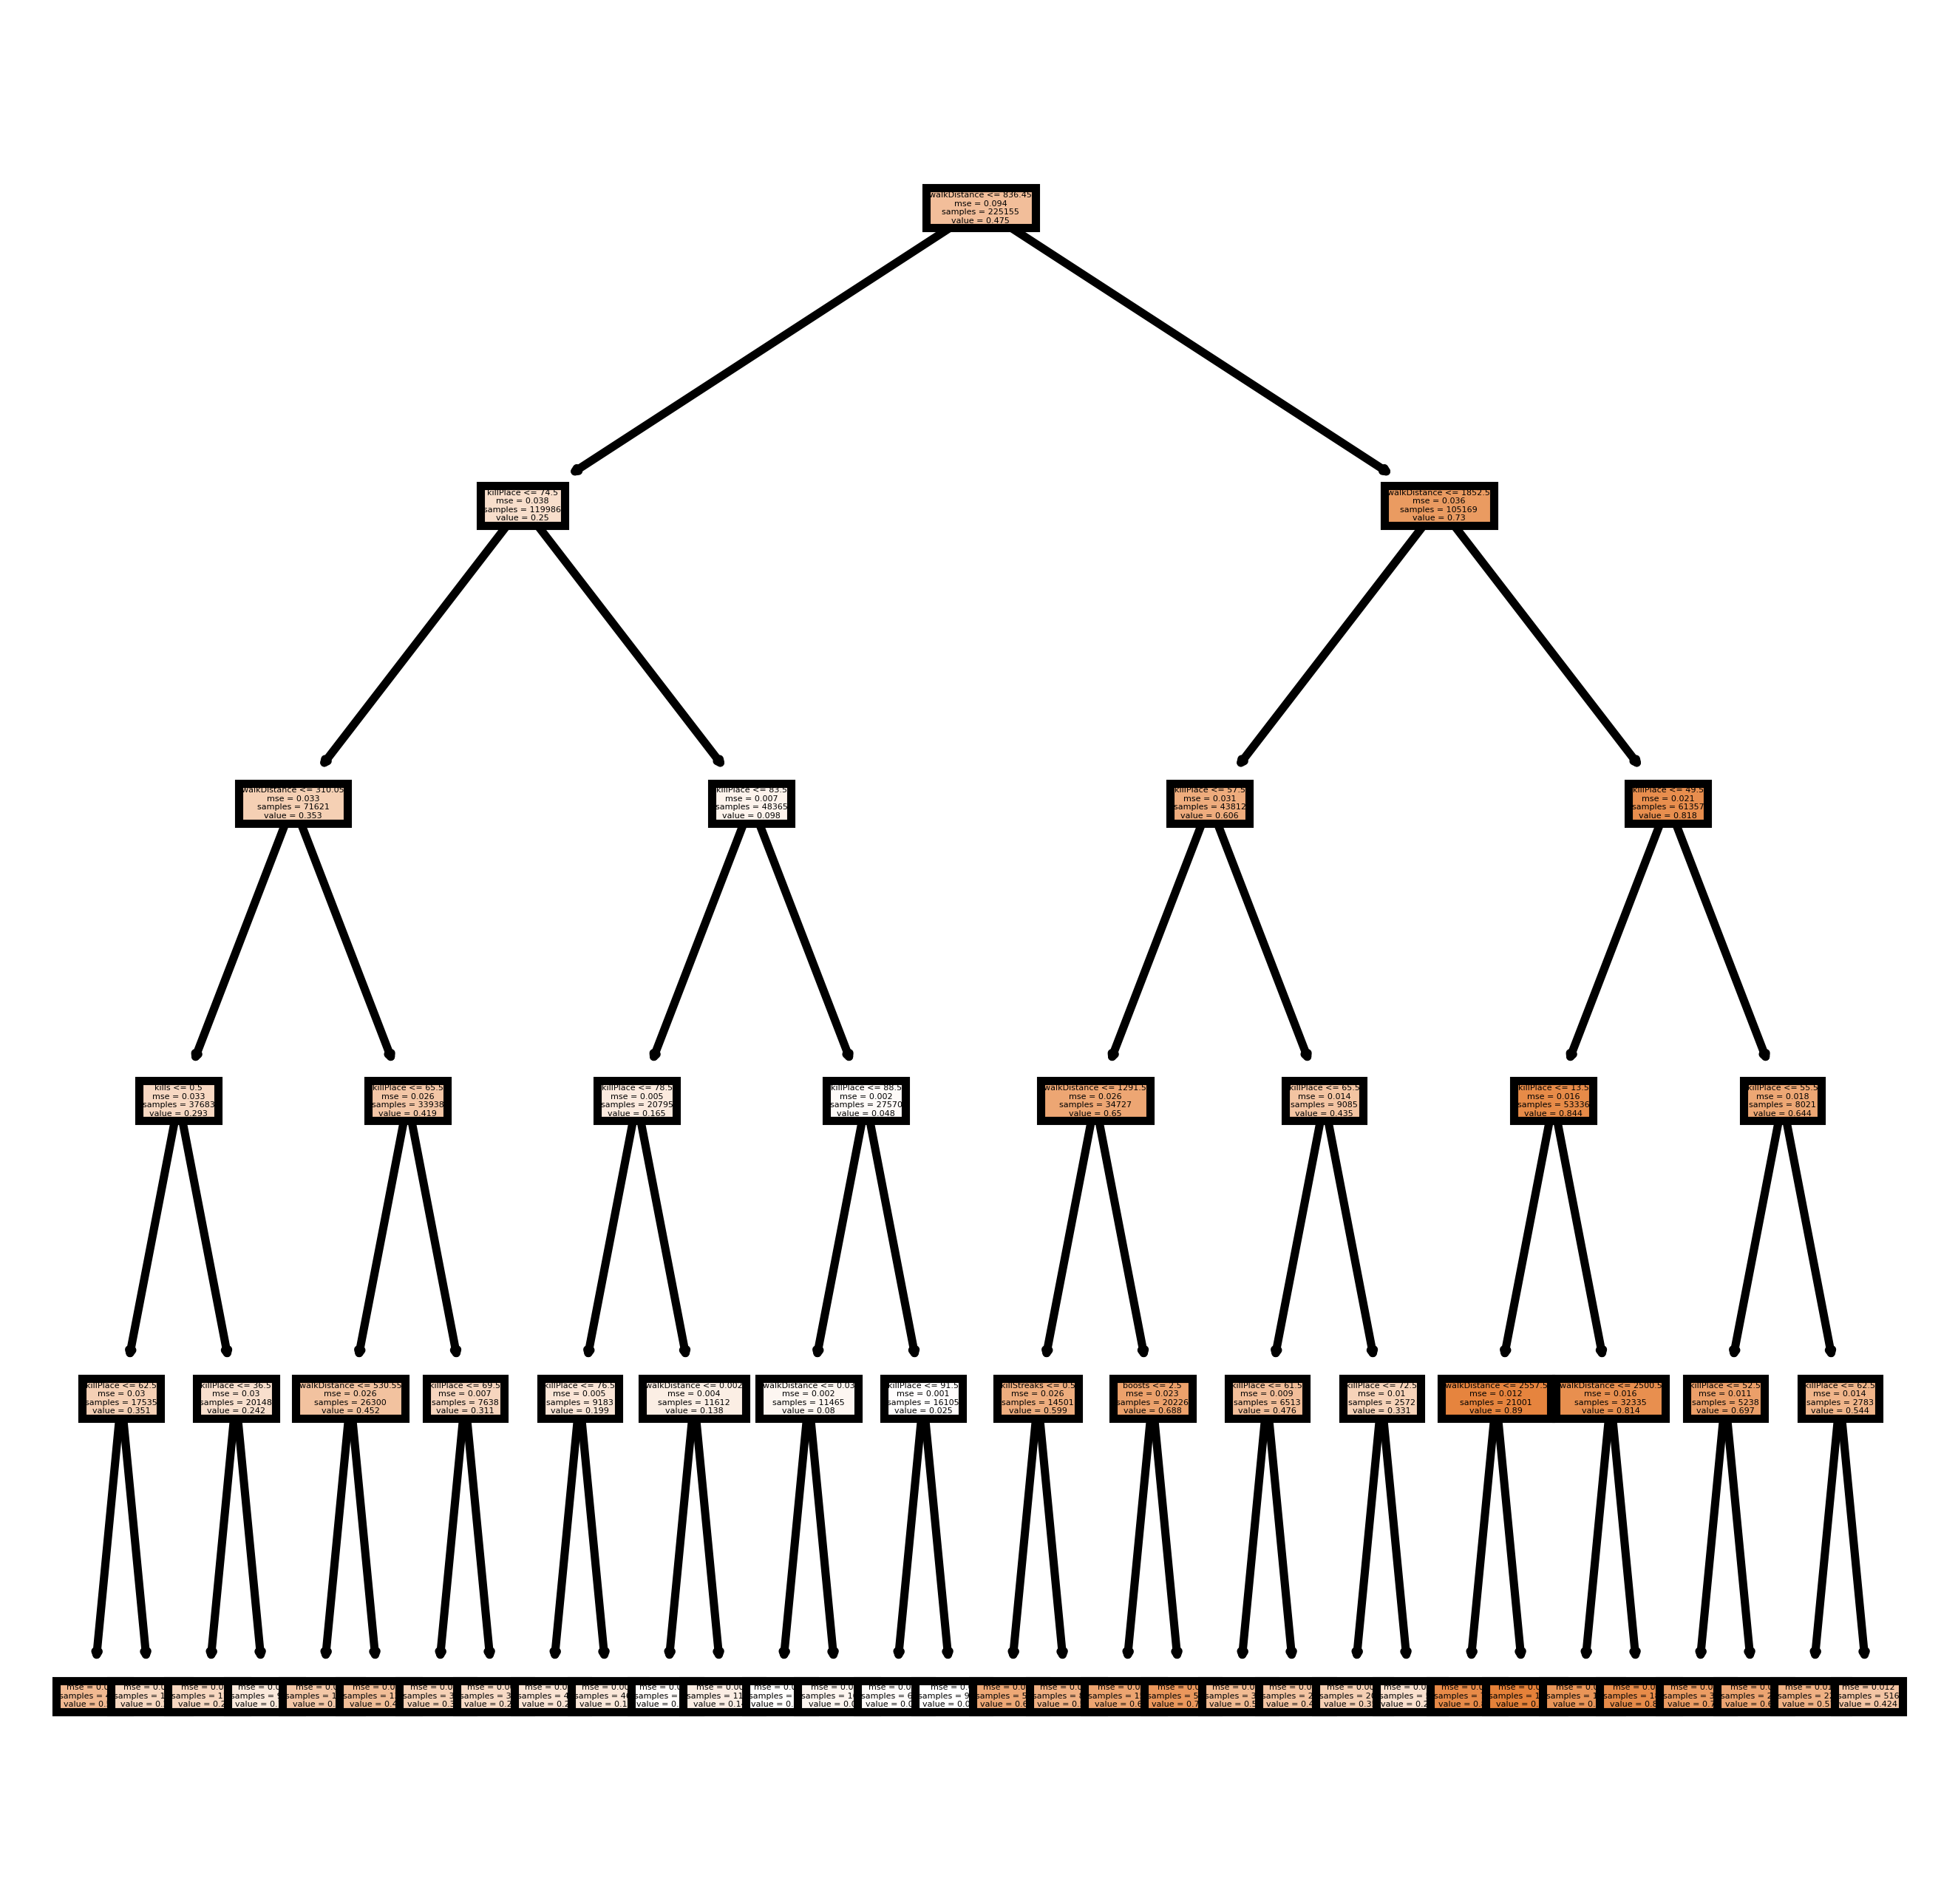

In [98]:
from sklearn import tree
fn=X_train.columns
cn="winPlacePerc"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(forest.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.show()

In [ ]:
my_Random_Forest(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Random Forest MAE: 0.08748335257552942
walkDistance : 0.8085641938720283
killPlace : 0.18127135465722677
boosts : 0.0019207408433969048
weaponsAcquired : 0.0
damageDealt : 0.0
heals : 0.0
kills : 0.004272391587695699
longestKill : 1.7710367012689294e-05
killStreaks : 0.003953608672639735


In [ ]:
for i in [20,40,60,80]:
  param_grid= {"n_estimators":i,
         "max_depth":5,'min_samples_leaf': 1}
  rf = RandomForestRegressor(n_estimators"=i,max_depth"=5,min_samples_leaf= 1)
  

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid= {"n_estimators":[20,40,60,80],
         "max_depth":[1,3,5],'min_samples_leaf': [1, 2, 4]}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3)
rf_random.fit(X_train, y_train)
rf_random.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was 

{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 80}

In [82]:
rf_random.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 80}

XGBoost Regression

In [ ]:
def my_xgb(X_train, X_test, y_train, y_test):
  import xgboost as xg
  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score
  param = {"booster":"gblinear", "objective":"reg:squarederror"}
  xgb_reg = xg.XGBRegressor(params = param,n_estimators = 100,max_depth=5)
  xgb_reg.fit(X_train,y_train)
  y_pred = xgb_reg.predict(X_test)
  print('XGBoost MAE:', mean_absolute_error(y_test, y_pred))
  xgb_importance = xgb_reg.feature_importances_
  for i in range(len(xgb_importance)):
    print(feature_label[i],':',xgb_importance[i])

In [ ]:
my_xgb(X_train, X_test, y_train, y_test)

KNN Regressor with 5-fold cross validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def KNN_CV(X_train, y_train):
  knn_benchmark = list()
  for i in range(11,41,2):
    knn_reg = KNeighborsRegressor(n_neighbors = i)
    scores = cross_val_score(knn_reg,X_train,y_train,cv = 5,scoring='neg_mean_absolute_error')
    knn_benchmark.append(scores.mean())
  #from plot, k = 19 is the best
  plt.plot(range(11,41,2),knn_benchmark)
  plt.xlabel('K')
  plt.ylabel('MAE')
  print('k = 19, MAE=',knn_benchmark[4]*-1)

In [ ]:
# KNN_CV(X_train, y_train)

In [ ]:
def my_KNN(X_train, X_test, y_train, y_test):
  from sklearn.preprocessing import StandardScaler
  standardized_X_train = StandardScaler().fit_transform(X_train)
  knn_reg = KNeighborsRegressor(n_neighbors = 19)
  knn_reg.fit(standardized_X_train, y_train)
  standardized_X_test = StandardScaler().fit_transform(X_test)
  y_pred = knn_reg.predict(standardized_X_test)
  print('KNN MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
my_KNN(X_train, X_test, y_train, y_test)

SVM Regression (SVR) failed since it takes too much time

In [ ]:
def my_SVM(X_train, X_test, y_train, y_test):
  from sklearn.preprocessing import StandardScaler
  from sklearn.svm import SVR
  standardized_X_train = StandardScaler().fit_transform(X_train)
  standardized_X_test = StandardScaler().fit_transform(X_test)
  svr_reg = SVR(kernel = 'rbf')
  svr_reg.fit(standardized_X_train, y_train)
  y_pred = svr_reg.predict(standardized_X_test)
  print('SVR MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
# my_SVM(X_train, X_test, y_train, y_test)

Neutral Network

In [ ]:
X_train.shape

In [ ]:
def my_neutral_network(X_train, X_test, y_train, y_test):
  import tensorflow as tf
  from keras.models import Sequential
  from keras.layers import Dense
  from sklearn.preprocessing import StandardScaler
  standardized_X_train = StandardScaler().fit_transform(X_train)
  standardized_X_test = StandardScaler().fit_transform(X_test)
  my_neutral_net = Sequential()

  my_neutral_net.add(Dense(8, activation='relu', input_shape=(9,)))
  my_neutral_net.add(Dense(8, activation='relu'))
  my_neutral_net.add(Dense(1, activation='sigmoid'))

  my_neutral_net.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['mean_absolute_error'])
  my_neutral_net.fit(standardized_X_train, y_train,epochs=10, batch_size=64)
  y_pred = my_neutral_net.predict(standardized_X_test)
  print('Neural Net MAE:', mean_absolute_error(y_test, y_pred))

In [ ]:
my_neutral_network(X_train, X_test, y_train, y_test)